<b><u><center>HOMEWORK 4B Image Data Set</center></u></b>

<b>Dimesntionality Reduction Methods</b>

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import FastICA

def tsne(X):
    tsne = TSNE(n_components=2,init='random',perplexity=57)
    X_tsne = tsne.fit_transform(X)
    return X_tsne


def pca(X):
    pca = PCA(n_components=2)
    X_tsne= pca.fit_transform(X)
    return X_tsne


<b>Blurring image smooths edges and removes noise from an image</b> 

In [12]:
import cv2

def blur_image(df):
    for i in range(len(df)):
        image = df.iloc[i].values.reshape((28, 28))
        scaled_image = image / 255
        blurred_image = cv2.GaussianBlur(scaled_image, (5, 5), 0)
        df.iloc[i] = blurred_image.flatten()
    return df

<b>Importing Data</b> 

In [13]:
import pandas as pd

df_Test = pd.read_csv('ImageDataSet.txt',header=None)
df_Test.iloc[0][400]

118

In [18]:
blurredimg=blur_image(df_Test)

In [19]:
blurredimg.iloc[0][400] 

0.0017243893574586699

<b>Applying TSNE with 57 perlexity</b> 

In [82]:
image_X_trial=tsne(blurredimg) #  autoEncoder, randomProjection ,ica , apply_svd, feature_selection, normalize ,tsne, pca
image_X_trial   

C:\Users\vorad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 12.861209 ,   6.33819  ],
       [-70.87856  ,   1.1808869],
       [ 37.69243  , -23.70396  ],
       ...,
       [ 47.383686 , -17.694622 ],
       [ 17.077417 , -21.147503 ],
       [ -6.862457 ,   7.3909636]], dtype=float32)

<b>Visualizing Data</b> 

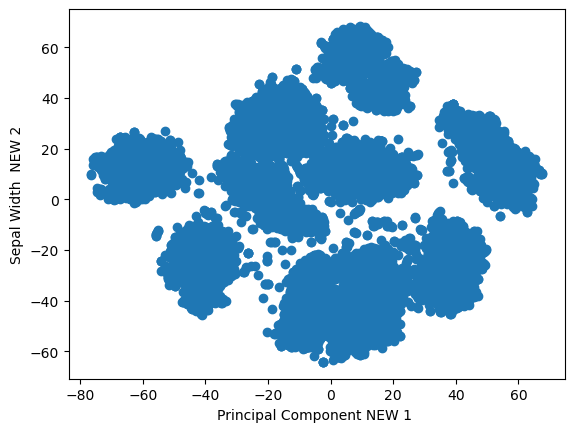

In [83]:
import matplotlib.pyplot as plt
plt.scatter(image_X_trial[:, 0], image_X_trial[:, 1])
plt.xlabel('Principal Component NEW 1 ')
plt.ylabel('Sepal Width  NEW 2')
plt.show()

<b>K MEANS Implmentation</b> 

In [28]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import random
from scipy.spatial.distance import cdist


class KMeansImp():
    def __init__(self, X_Data, K_Clusters, F):
        self.K_Clusters = K_Clusters
        self.X_Data = X_Data
        self.Y = None
        self.errorValue =[]
        self.distValue = np.zeros((X_Data.shape[0], K_Clusters))
        self.Centroid = random.sample(list(self.X_Data), self.K_Clusters)
        self.features = F
 
    def centroids(self):      
        CentroidList = np.zeros((self.K_Clusters, self.features))
        for i in range(self.K_Clusters):
            if(i==0):
                CentroidList[0] = self.X_Data[np.random.choice(self.X_Data.shape[0],1)]
            CentroidList[i] = self.X_Data[self.Y == i].mean(axis = 0)

        if np.array_equal(self.Centroid, CentroidList):
            return True;   

        self.Centroid = np.asarray(CentroidList)
            return False; 
    
    def distances(self):
        self.distValue =cdist(self.X_Data, self.Centroid, 'euclidean')# euclidean_distances(self.X_Data,self.Centroid)

    def clusters(self):
        self.Y = np.argmin(self.distValue, axis = 1)

    def inertia(self):
        self.errorValue.append(np.sum(np.min(cdist(self.X_Data, self.Centroid, 'euclidean'), axis=1)**2))
                          
    def Main(self, itr):
        for i in range(itr):
            self.distances()
            self.clusters()
            breakingCondt=self.centroids()
            if(breakingCondt):
                #print('Breaking at:',itr)
                break
            self.inertia()
        
        return self.Centroid, self.errorValue, self.Y

def increment_y(y_test_self_kmeans):
    for i in range(len(y_test_self_kmeans)):
        y_test_self_kmeans[i] += 1
    return y_test_self_kmeans

<b>Gathering Evaluation Metrics</b> 

Breaking at: 1000


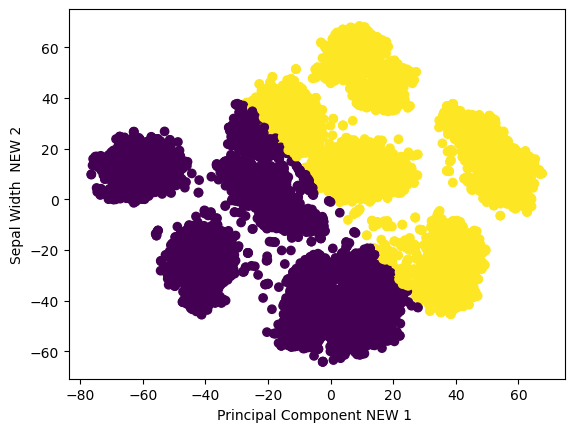

Iteration 2 Score:-  0.34718645
Breaking at: 1000


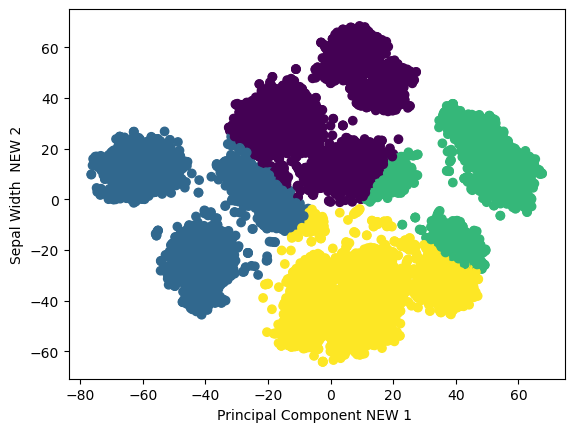

Iteration 4 Score:-  0.43590048
Breaking at: 1000


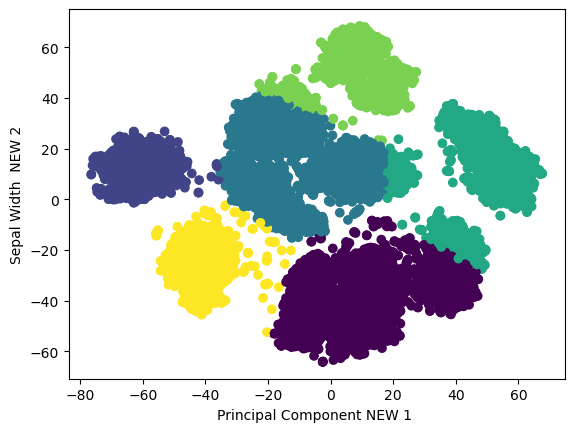

Iteration 6 Score:-  0.46982577
Breaking at: 1000


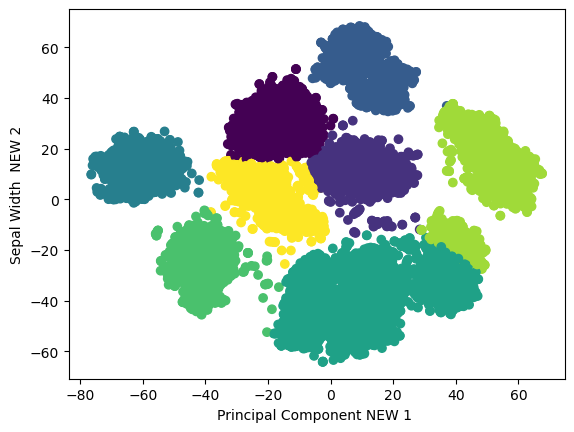

Iteration 8 Score:-  0.49679312
Breaking at: 1000


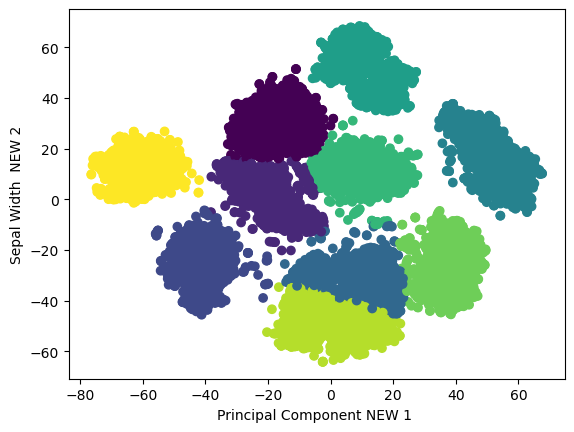

Iteration 10 Score:-  0.51685613
Breaking at: 1000


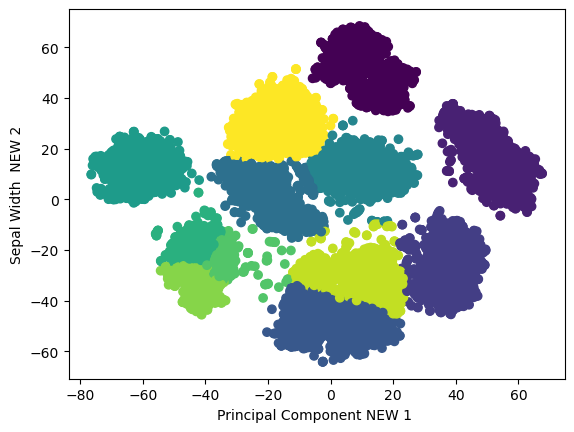

Iteration 12 Score:-  0.48409566
Breaking at: 1000


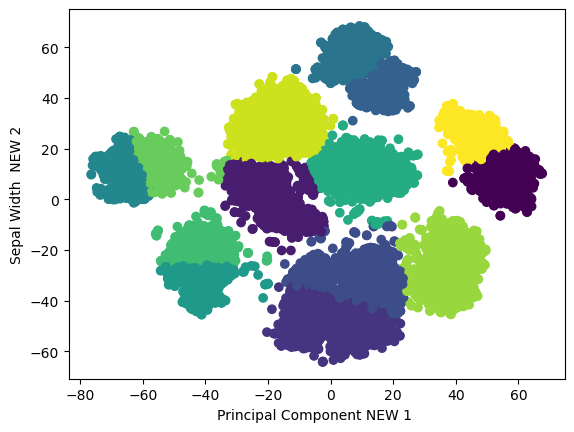

Iteration 14 Score:-  0.44219655
Breaking at: 1000


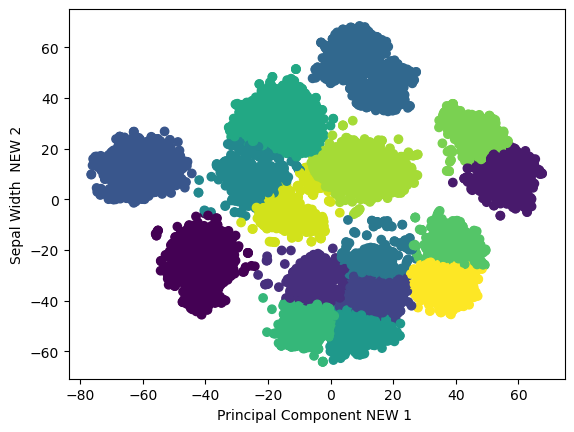

Iteration 16 Score:-  0.4834909
Breaking at: 1000


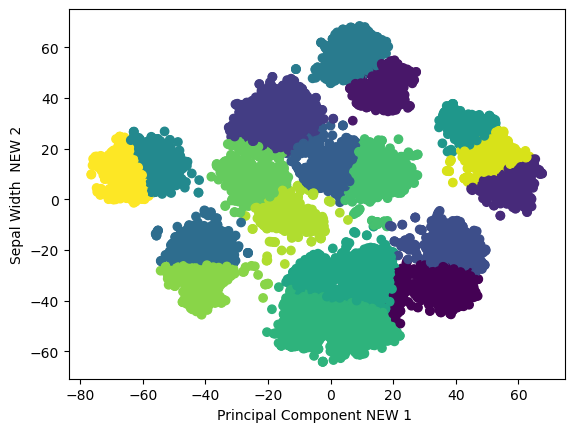

Iteration 18 Score:-  0.40374404
Breaking at: 1000


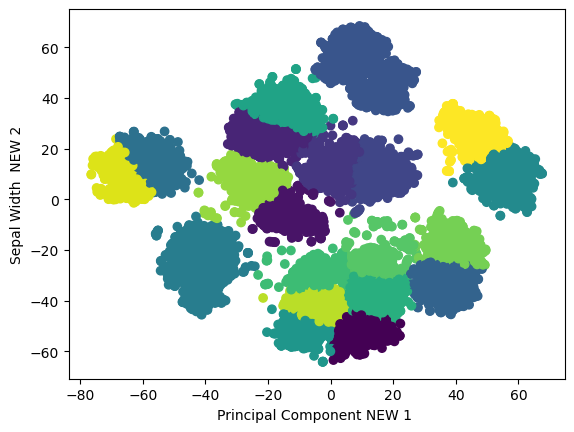

Iteration 20 Score:-  0.43282735


In [85]:
from sklearn.metrics import silhouette_score
score_trials=[]
for i in range(2,21,2):
    k_image_trial= KMeansImp(image_X_trial, i, image_X_trial.shape[1])
    centroid_trial, errorValue_trial, y_image_kmeans_trial=k_image_trial.Main(1000)
    y_image_kmeans_trial=increment_y(y_image_kmeans_trial)
    score_trial = silhouette_score(image_X_trial, y_image_kmeans_trial)
    score_trials.append(score_trial)
    plt.scatter(image_X_trial[:, 0], image_X_trial[:, 1], c=y_image_kmeans_trial, cmap='viridis')
    plt.xlabel('Principal Component NEW 1 ')
    plt.ylabel('Sepal Width  NEW 2')
    plt.show()
    print('Iteration',i,'Score:- ',score_trial)

<b>Running K means on PCA</b>

In [99]:
image_pca=pca(blurredimg) #  autoEncoder, randomProjection ,ica , apply_svd, feature_selection, normalize ,tsne, pca
image_pca

array([[ 0.00410066,  0.00231613],
       [ 0.00745833, -0.00252291],
       [-0.00660425, -0.00017846],
       ...,
       [ 0.00152546,  0.00280788],
       [-0.00587702,  0.004902  ],
       [ 0.01667468,  0.00757191]])

Breaking at: 1000


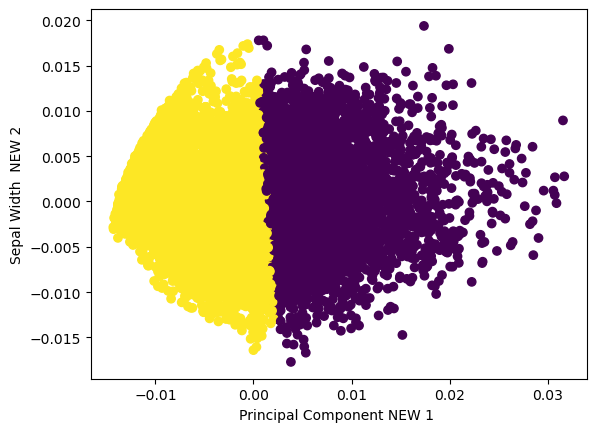

Iteration 2 Score:-  0.3667541887415071
Breaking at: 1000


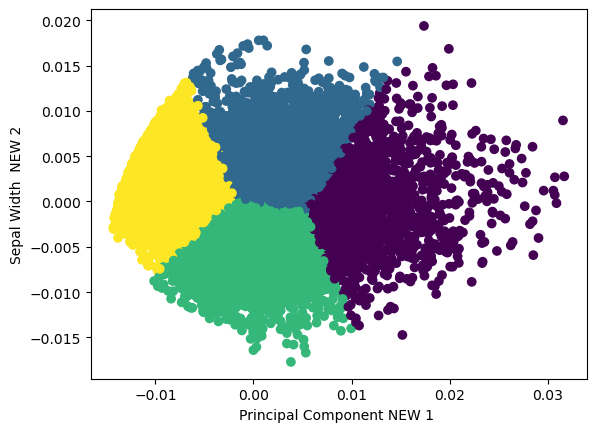

Iteration 4 Score:-  0.36100095862477094
Breaking at: 1000


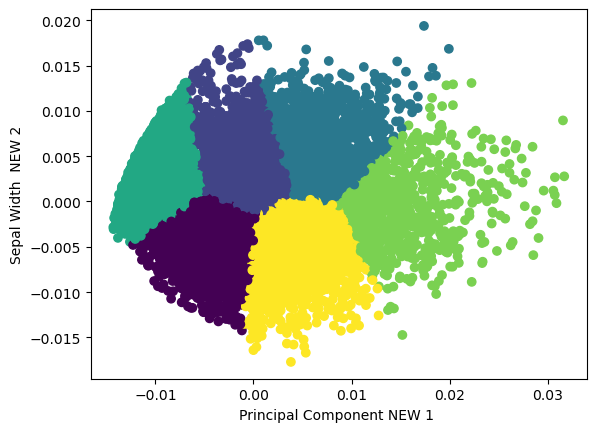

Iteration 6 Score:-  0.34208804724185427
Breaking at: 1000


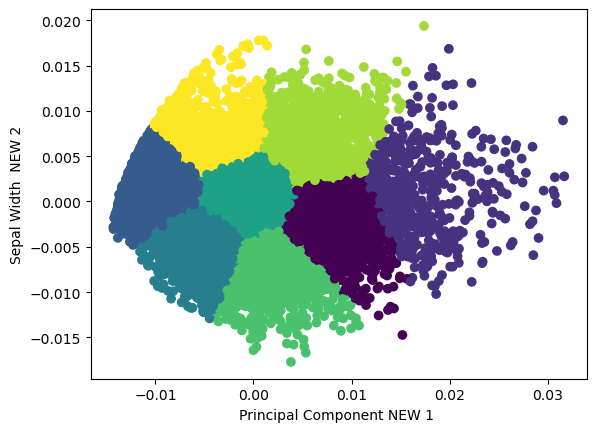

Iteration 8 Score:-  0.33373086422443093
Breaking at: 1000


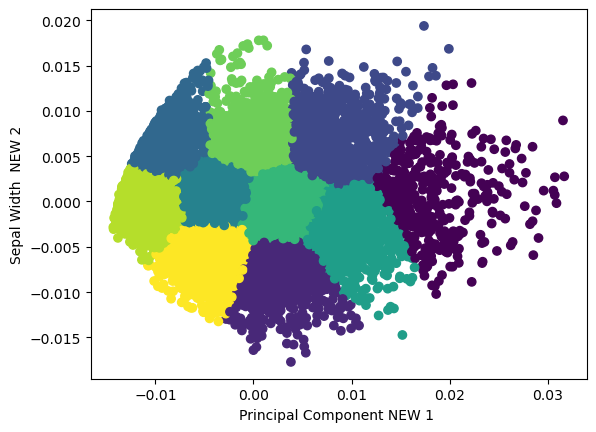

Iteration 10 Score:-  0.3405414705677725
Breaking at: 1000


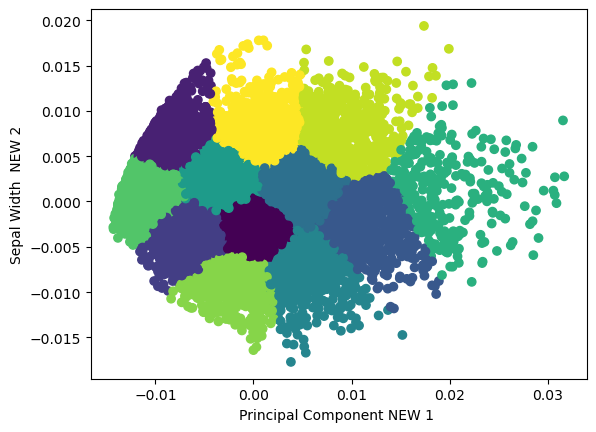

Iteration 12 Score:-  0.3401802662515188
Breaking at: 1000


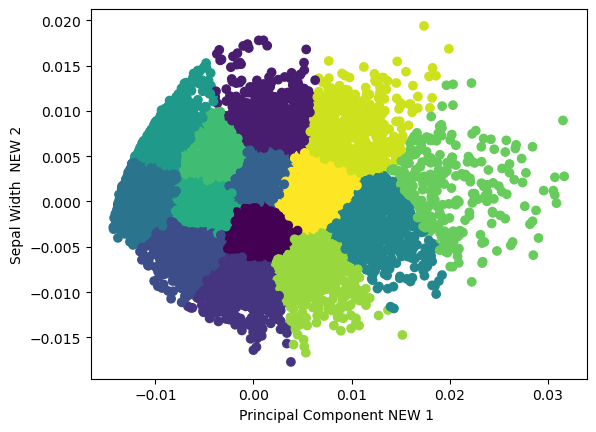

Iteration 14 Score:-  0.33083575490634115
Breaking at: 1000


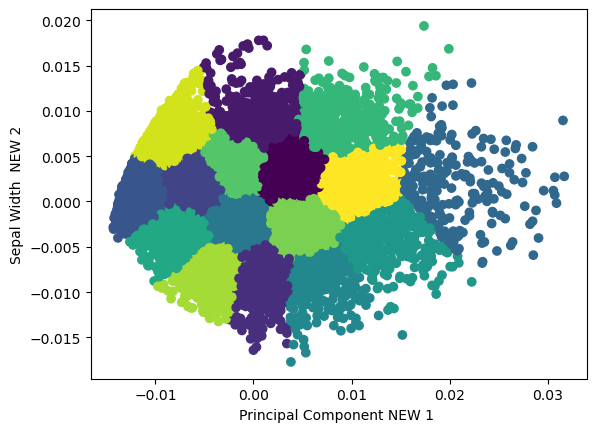

Iteration 16 Score:-  0.3301879900763476
Breaking at: 1000


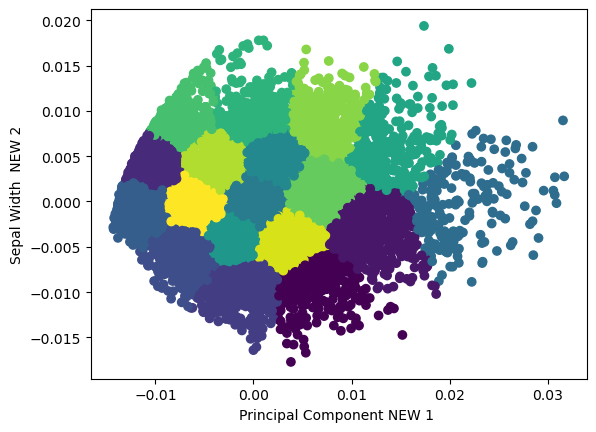

Iteration 18 Score:-  0.32857492728449766
Breaking at: 1000


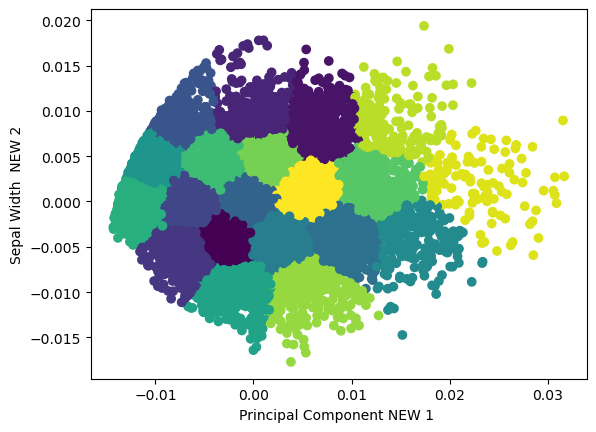

Iteration 20 Score:-  0.33621680757605615


In [101]:
from sklearn.metrics import silhouette_score

scores__pca=[]

for i in range(2,21,2):
    k_pca= KMeansImp(image_pca, i, image_pca.shape[1])
    centroid_pca, errorValue__pca, y_pca = k_pca.Main(1000)
    y_pca =  increment_y(y_pca)
    s_pca = silhouette_score( image_pca, y_pca)
    scores__pca.append(s_pca)
    
    plt.scatter(image_pca[:, 0], image_pca[:, 1], c=y_pca, cmap='viridis')
    plt.xlabel('Principal Component NEW 1 ')
    plt.ylabel('Sepal Width  NEW 2')
    plt.show()
    
    print('Iteration',i,'Score:- ',s_pca)

<b>Running for 10 clusters</b> 

Breaking at: 21
K 10 Score:-  0.51695585


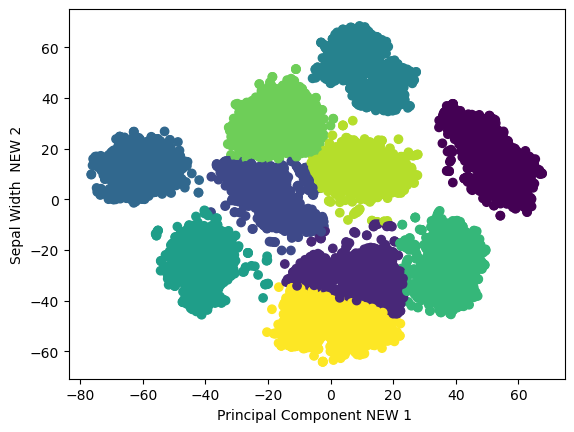

In [84]:
k= KMeansImp(image_X_trial, 10, image_X_trial.shape[1])

centroid_trial,errorValue_trial,y_image_kmeans=k.Main(21)#tsne perplexity=57

y_image_kmeans=increment_y(y_image_kmeans)

score_trial = silhouette_score(image_X_trial, y_image_kmeans)
print('K',10,'Score:- ',score_trial)
plt.scatter(image_X_trial[:, 0], image_X_trial[:, 1], c=y_image_kmeans, cmap='viridis')

plt.xlabel('Principal Component NEW 1 ')
plt.ylabel('Sepal Width  NEW 2')
plt.show()



<b>Plotting Evaluation Metrics</b> 

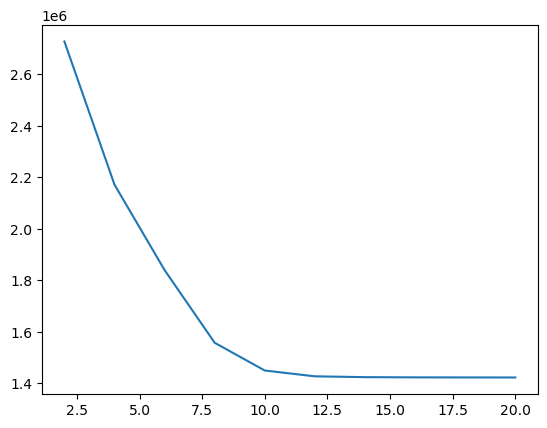

In [58]:
clusters=[2,4,6,8,10,12,14,16,18,20]
plt.plot(clusters,errorValue_trial)
plt.show()

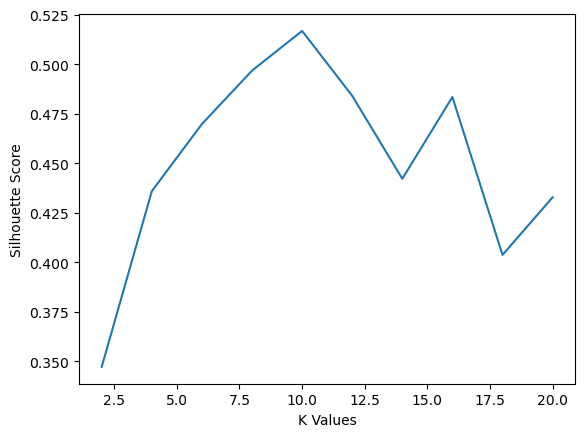

In [88]:
clusters=[2,4,6,8,10,12,14,16,18,20]
plt.plot( clusters,score_trials)
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.show()

<b>Evaluation File</b> 

In [90]:
file = open("Experiment 0.51695585_tsne_57_Image_Test.txt", "w") 

for i, item in enumerate(y_image_kmeans_exp_trial):
    file.write(str(item) + "\n")

file.close()